# Caso de Aplicación: Electromobility Plus

## Diplomado en Python y Ciencia de Datos

### Curso: Herramientas Básicas de Programación en Python

**Docente:** Patricia Andrea Moller Acuña

**Integrantes:**

- Margarita Isabel Barrales Quintero
- Cristofer Edgardo Carvajal García
- Fernando Andrés Gaete Velásquez
- Camilo Roberto Maldonado Valderrama
- Sebastian Andrés Saez Saez

In [1]:
# Cargar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Cargar los datos desde archivo CSV public_transportation_statistics_by_zip_code-1.csv en un DF
data = pd.read_csv('public_transportation_statistics_by_zip_code-1.csv')

# Mostrar las primeras filas y verificar el encabezado
print(data.head())

   zip_code  public_transportation_pct  public_transportation_population
0      1379                        3.3                                13
1      1440                        0.4                                34
2      1505                        0.9                                23
3      1524                        0.5                                20
4      1529                        1.8                                32


In [3]:
# 3. Verificar el tipo de datos y los valores nulos
print("Información del conjunto de datos:")
print(data.info())
# 3 Descripción estadística del dataset para conocer max y min
print("\nDescripción estadística del dataset:")
print(data.describe())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   zip_code                          33120 non-null  int64  
 1   public_transportation_pct         33120 non-null  float64
 2   public_transportation_population  33120 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 776.4 KB
None

Descripción estadística del dataset:
           zip_code  public_transportation_pct  \
count  33120.000000               3.312000e+04   
mean   49666.334209              -1.115137e+07   
std    27564.925769               8.549920e+07   
min      601.000000              -6.666667e+08   
25%    26634.750000               0.000000e+00   
50%    49739.000000               0.000000e+00   
75%    72123.500000               1.100000e+00   
max    99929.000000               1.000000e+02 

In [4]:
# 3. Eliminar valores negativos y nulos en columnas importantes
data = data[data['public_transportation_pct'] >= 0]
data.dropna(subset=['public_transportation_pct', 'public_transportation_population'], inplace=True)

# Verificar el tipo de datos y los valores nulos después de la limpieza
print("\nInformación del conjunto de datos después de la limpieza:")
print(data.info())

# Descripción estadística después de la limpieza
description = data.describe()

# Formatear la tabla con pandas Styler
styled_description = description.style\
    .set_caption("Descripción Estadística del Dataset después de la Limpieza")\
    .format("{:.2f}")\
    .set_properties(**{'text-align': 'right'})\
    .set_table_styles([dict(selector="th", props=[('text-align', 'right')])])\
    .background_gradient(cmap='viridis', axis=0)

# Mostrar la tabla formateada
display(styled_description)


Información del conjunto de datos después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 32566 entries, 0 to 33119
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   zip_code                          32566 non-null  int64  
 1   public_transportation_pct         32566 non-null  float64
 2   public_transportation_population  32566 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1017.7 KB
None


,zip_code,public_transportation_pct,public_transportation_population
count,32566.00,32566.00,32566.00
mean,49661.29,1.94,234.27
std,27509.63,6.10,1324.16
min,601.00,0.00,0.00
25%,26775.50,0.00,0.00
50%,49775.50,0.00,0.00
75%,72064.75,1.20,43.00
max,99929.00,100.00,35139.00


In [5]:
# 4. Definir categorías de ventas potenciales (High/Low) basadas en el porcentaje de uso del transporte público
data['potential_sales_category'] = np.where(data['public_transportation_pct'] > 10, 'High', 'Low')
print(data.head())

   zip_code  public_transportation_pct  public_transportation_population  \
0      1379                        3.3                                13   
1      1440                        0.4                                34   
2      1505                        0.9                                23   
3      1524                        0.5                                20   
4      1529                        1.8                                32   

  potential_sales_category  
0                      Low  
1                      Low  
2                      Low  
3                      Low  
4                      Low  


### Explicación de la Aproximación Utilizada para Calcular Ventas Potenciales

Para abordar la pregunta sobre las ventas potenciales promedio en zonas de alto y bajo uso del transporte público, hemos utilizado el promedio de la población que utiliza transporte público (`public_transportation_population`) como un proxy para las ventas potenciales de scooters. 

Un 'proxy' es una medida que se utiliza para representar o estimar otra variable que no se puede medir directamente. En este caso, estamos asumiendo que el número de personas que usan transporte público en una zona postal (public_transportation_population) puede servir como una indicación de cuántas ventas potenciales de scooters podría haber en esa zona.


Ventas potenciales promedio en zonas de alto uso de transporte público: 3346.69 unidades
Ventas potenciales promedio en zonas de bajo uso de transporte público: 79.47 unidades


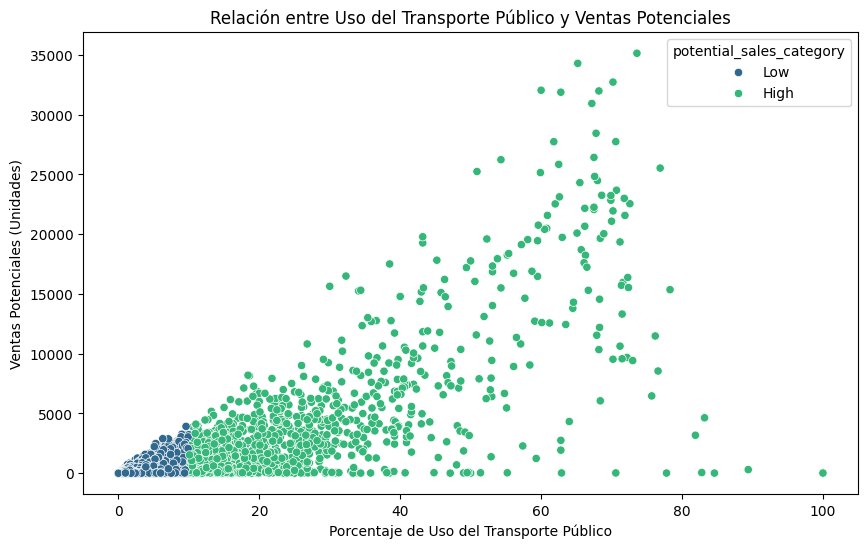

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Calcular ventas potenciales promedio para zonas de alto y bajo uso del transporte público
average_sales_high = data[data['potential_sales_category'] == 'High']['public_transportation_population'].mean()
average_sales_low = data[data['potential_sales_category'] == 'Low']['public_transportation_population'].mean()

print(f'\nVentas potenciales promedio en zonas de alto uso de transporte público: {average_sales_high:.2f} unidades')
print(f'Ventas potenciales promedio en zonas de bajo uso de transporte público: {average_sales_low:.2f} unidades')

# 6. Crear un diagrama de dispersión para visualizar la relación entre el uso del transporte público y las ventas potenciales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='public_transportation_pct', y='public_transportation_population', hue='potential_sales_category', palette='viridis')
plt.title('Relación entre Uso del Transporte Público y Ventas Potenciales')
plt.xlabel('Porcentaje de Uso del Transporte Público')
plt.ylabel('Ventas Potenciales (Unidades)')
plt.show()

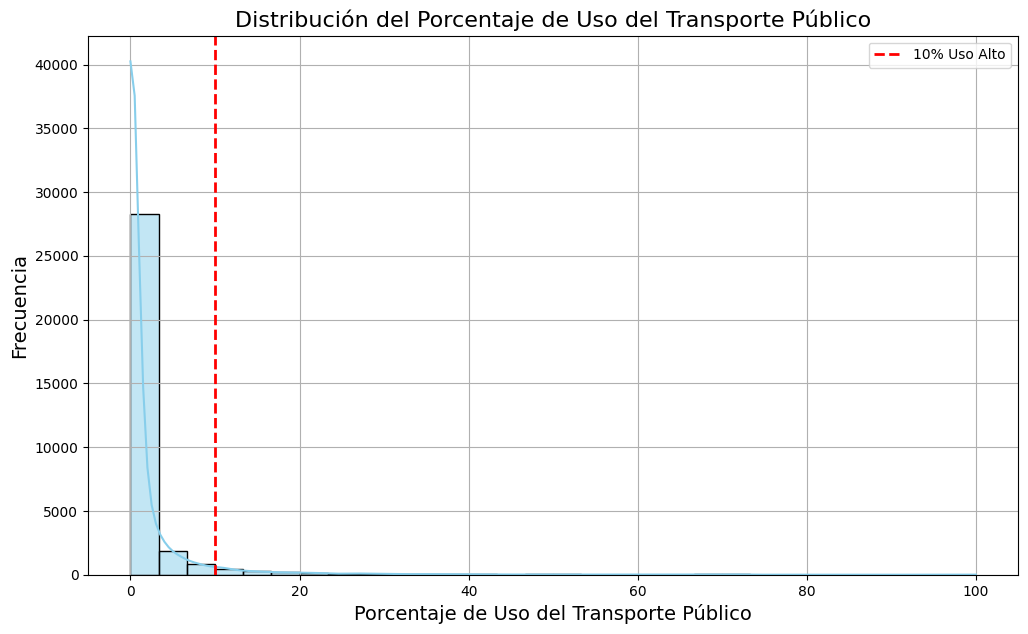

In [7]:
# 5. Histograma de distribución del porcentaje de uso del transporte público
plt.figure(figsize=(12, 7))
sns.histplot(data['public_transportation_pct'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='10% Uso Alto')
plt.title('Distribución del Porcentaje de Uso del Transporte Público', fontsize=16)
plt.xlabel('Porcentaje de Uso del Transporte Público', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 6. Exportar a excel

# Seleccionar las columnas necesarias
columns_to_export = ['zip_code', 'potential_sales_category', 'public_transportation_pct', 'public_transportation_population']

# Crear un nuevo dataframe con las columnas seleccionadas
export_data = data[columns_to_export].copy()

# Exportar el dataframe a un archivo Excel
export_data.to_excel('datos_completos.xlsx', index=False)

print("Los datos han sido exportados a 'datos_completos.xlsx'")

Los datos han sido exportados a 'datos_completos.xlsx'


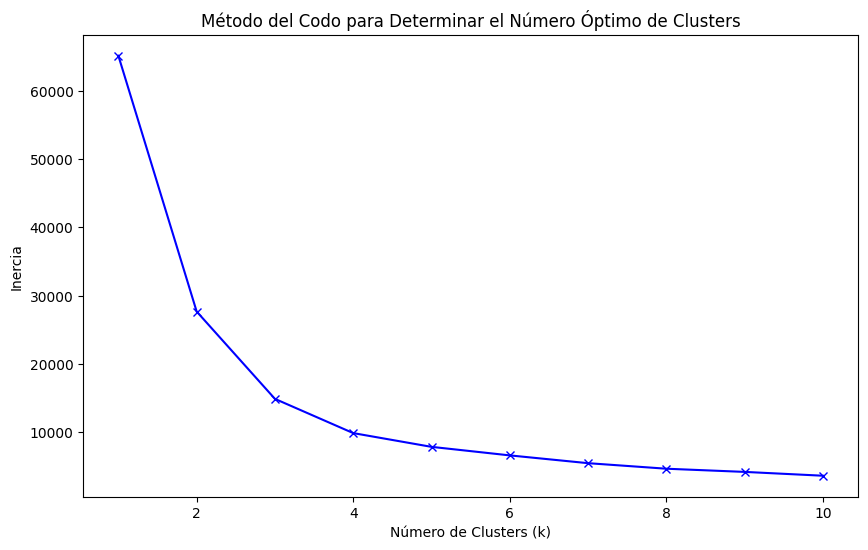

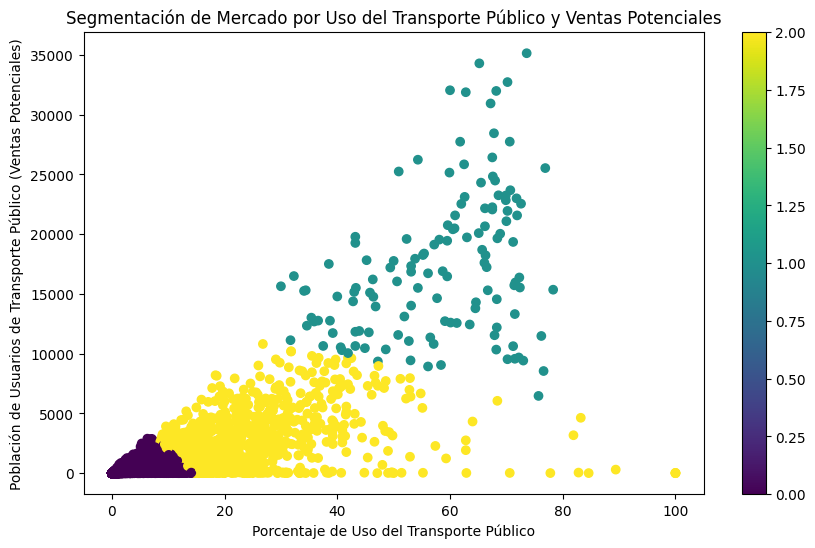


Estadísticas del Cluster 0:
       public_transportation_pct  public_transportation_population
count               31322.000000                      31322.000000
mean                    0.979842                         81.850457
std                     2.034399                        234.313849
min                     0.000000                          0.000000
25%                     0.000000                          0.000000
50%                     0.000000                          0.000000
75%                     0.900000                         31.000000
max                    14.600000                       2891.000000

Estadísticas del Cluster 1:
       public_transportation_pct  public_transportation_population
count                 132.000000                        132.000000
mean                   58.000000                      17417.984848
std                    12.250571                       6173.350755
min                    30.000000                       6468.000000
25% 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supongamos que ya tienes el dataframe 'data' cargado y limpiado

# Seleccionar las variables para el clustering
features = data[['public_transportation_pct', 'public_transportation_population']]

# Estandarizar las variables
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Método del codo para determinar el número óptimo de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

# Seleccionar el número óptimo de clusters (por ejemplo, 3)
optimal_k = 3

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
data['cluster'] = kmeans.labels_

# Visualizar los clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['public_transportation_pct'], data['public_transportation_population'], c=data['cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('Segmentación de Mercado por Uso del Transporte Público y Ventas Potenciales')
plt.xlabel('Porcentaje de Uso del Transporte Público')
plt.ylabel('Población de Usuarios de Transporte Público (Ventas Potenciales)')
plt.show()

# Mostrar estadísticas de cada cluster
for i in range(optimal_k):
    cluster_data = data[data['cluster'] == i]
    print(f'\nEstadísticas del Cluster {i}:')
    print(cluster_data[['public_transportation_pct', 'public_transportation_population']].describe())

In [10]:
import pandas as pd

# Filtrar el dataframe para obtener solo las filas del cluster 1
cluster_1_data = data[data['cluster'] == 1]

# Mostrar la cantidad de códigos postales del cluster 1
print(f'Cantidad de códigos postales en el Cluster 1: {len(cluster_1_data)}')

# Seleccionar las columnas deseadas y ordenar la tabla de forma descendente en la columna public_transportation_population
cluster_1_data_sorted = cluster_1_data[['zip_code', 'public_transportation_pct', 'public_transportation_population']].sort_values(by='public_transportation_population', ascending=False)

# Mostrar los códigos postales del cluster 1 en una tabla formateada
styled_table = cluster_1_data_sorted.style.set_caption('Códigos Postales del Cluster 1 Ordenados por Población de Usuarios de Transporte Público')
display(styled_table)

Cantidad de códigos postales en el Cluster 1: 132


,zip_code,public_transportation_pct,public_transportation_population
2633,11226,73.600000,35139
2827,11368,65.200000,34292
2580,11373,70.200000,32724
2828,11385,60.000000,32041
2836,10025,68.200000,31983
2661,11211,62.800000,31877
2759,11377,67.200000,30936
2630,11215,67.800000,28443
2724,11221,70.600000,27740
2756,11220,61.800000,27737
